<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_9/kmeans_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
train_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")

In [79]:
test_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
Total = train_df.isnull().sum().sort_values(ascending = False)          
Percent = (train_df.isnull().sum()*100/train_df.isnull().count()).sort_values(ascending = False) 

missing_data = pd.concat([Total, Percent], axis = 1)    
print(missing_data) 

               0          1
Cabin        687  77.104377
Age          177  19.865320
Embarked       2   0.224467
PassengerId    0   0.000000
Survived       0   0.000000
Pclass         0   0.000000
Name           0   0.000000
Sex            0   0.000000
SibSp          0   0.000000
Parch          0   0.000000
Ticket         0   0.000000
Fare           0   0.000000


In [82]:
train_df.drop(['Cabin'], axis =1, inplace=True)
test_df.drop(['Cabin'], axis =1, inplace=True)

In [83]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train_df['Sex']= label_encoder.fit_transform(train_df['Sex'])
print(train_df['Sex'].unique())

train_df.head()

[1 0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [109]:
train_df['Age'].fillna(train_df['Age'].mode()[0], inplace=True)

In [110]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [112]:
train_df = train_df.drop(['Name','Ticket','Embarked'], axis=1)
test_df = test_df.drop(['Name','Ticket','Embarked'], axis=1)

KeyError: ignored

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(train_df.corr(),cmap = "RdBu",annot=True,vmin=-1, vmax=1)
plt.show()

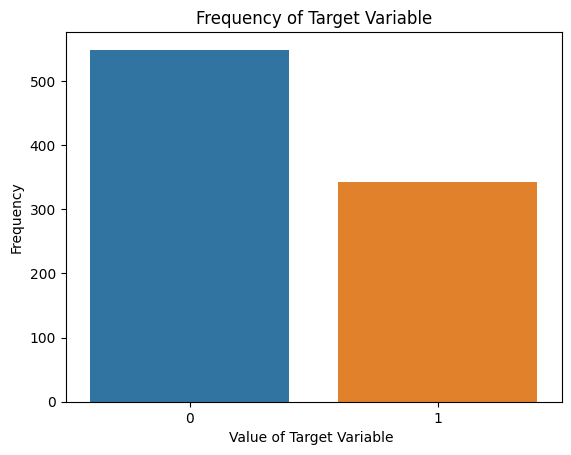

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
f = sns.countplot(x = train_df['Survived'])

plt.title('Frequency of Target Variable')
plt.xlabel('Value of Target Variable ')
plt.ylabel('Frequency')

plt.show()

In [114]:
from sklearn.utils import resample

dfmajority=train_df[train_df['Survived']==0]
dfminority=train_df[train_df['Survived']==1]
dfsampled=resample(dfminority,replace=True,n_samples=549,random_state=50)

df1=pd.concat([dfsampled,dfmajority])

df1['Survived'].value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=42)

In [118]:
kmeans.fit(train_df)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [119]:
kmeans.inertia_

17091185.734882936

In [120]:
kmeans.cluster_centers_

array([[2.23500000e+02, 3.92376682e-01, 2.34080717e+00, 6.16591928e-01,
        2.76855381e+01, 5.87443946e-01, 3.94618834e-01, 3.24868262e+01],
       [6.69000000e+02, 3.75280899e-01, 2.27640449e+00, 6.78651685e-01,
        2.94503820e+01, 4.58426966e-01, 3.68539326e-01, 3.19209546e+01]])